# Machine Learning & Statistics Project 2019

## Declan Reidy G00364690

### November 2019

In [3]:
import keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_boston

%matplotlib inline

Using TensorFlow backend.


In [4]:
#Set parameters for all displays within the notebook

plt.rcParams['figure.figsize'] = (10, 10)
sns.set(rc={'figure.figsize':(10,10)})


Importing the Boston House Prices dataset into Jupyter notebook from scikit-learn library. Note this comes in with the target variable separate.

In [5]:
boston_dataset = load_boston()

#check out the keys of the dataset so we can build our pandas dataframe
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Print a preview of the dataset to ensure it is as expected. Note that median house price value is not included under feature names as it is the target variable.

In [6]:
#check out the data section and note the target variable is missing as suspected
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Verify that 'target' key is in fact the target variable that we expect.

In [7]:
#Check if the target variable Median Value MEDV is represented by target as suspected.
boston['MEDV'] = boston_dataset.target
boston['MEDV'].head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

Append the target variable to our dataframe to allow easier comparisons later.

In [8]:
#Using the assign function add the target variable to our dataframe.
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston = boston.assign(MEDV = boston_dataset.target)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Verify that the dataset matches that from our back up csv file 'Boston House Prices'

In [9]:
#Compare with our CSV dataset and display the first 5 rows of the dataset.

df = pd.read_csv("BostonHousePrices.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


A good place to start is by describing the dataset and getting some descriptive statistics. 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Put the data into a distribution plot to check if it is normally distributed.

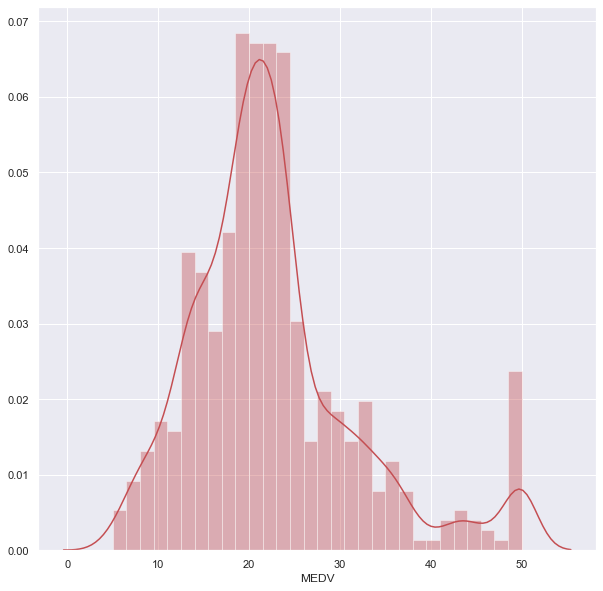

In [11]:
#Shows normal distribution more or less
sns.distplot(boston['MEDV'], bins=30, color="r")

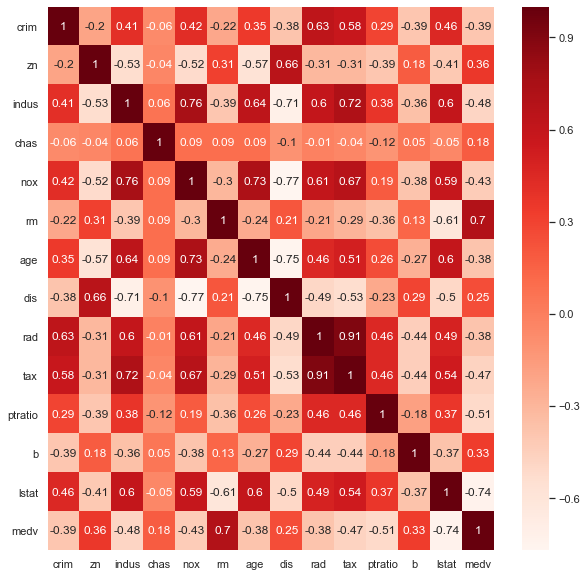

In [12]:
#check which variables are correlated to MEDV.
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True,cmap="Reds")
plt.yticks(rotation=0) #rotate the labels for y
# fix for mpl bug that cuts off top/bottom of seaborn viz 
#https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Using a correlation matrix and plotting using a heatmap we can see the strongest positive correlation between the median value of the property (MEDV) is the number of rooms (RM) at 0.7. The strongest negative correlation is between MEDV and the percentage of lower status of the population (LSTAT) at -0.74.

These should use feature variables which correlate to the target variable for Linear regression modelling. 

When training our network later we should check for multi-co-linearity and avoid using pairs strongly correlated to each other. Examples of a positively correlated pair (0.91) is Index of accessibility to radial highways (RAD) and Full-value property tax rate per $10,000 (TAX). Similarly an example of a negatively correlated pair (-0.75) is Weighted distances to five Boston employment centers (DIS) and Proportion of owner-occupied units built prior to 1940 (AGE) 

In [13]:
#Select feature variables based on correlation above
feature_var = ['rm', 'lstat', 'ptratio', 'medv'] #take out similar rad/tax, dis/age
df[feature_var].describe().T


,count,mean,std,min,25%,50%,75%,max
rm,506.0,6.284634,0.702617,3.561,5.8855,6.2085,6.6235,8.78
lstat,506.0,12.653063,7.141062,1.730,6.9500,11.3600,16.9550,37.97
ptratio,506.0,18.455534,2.164946,12.600,17.4000,19.0500,20.2000,22.00
medv,506.0,22.532806,9.197104,5.000,17.0250,21.2000,25.0000,50.00


In [14]:
#Now just correlate the chosen variables (large numbers show high correlation)
df[feature_var].corr()

,rm,lstat,ptratio,medv
rm,1.000000,-0.613808,-0.355501,0.695360
lstat,-0.613808,1.000000,0.374044,-0.737663
ptratio,-0.355501,0.374044,1.000000,-0.507787
medv,0.695360,-0.737663,-0.507787,1.000000


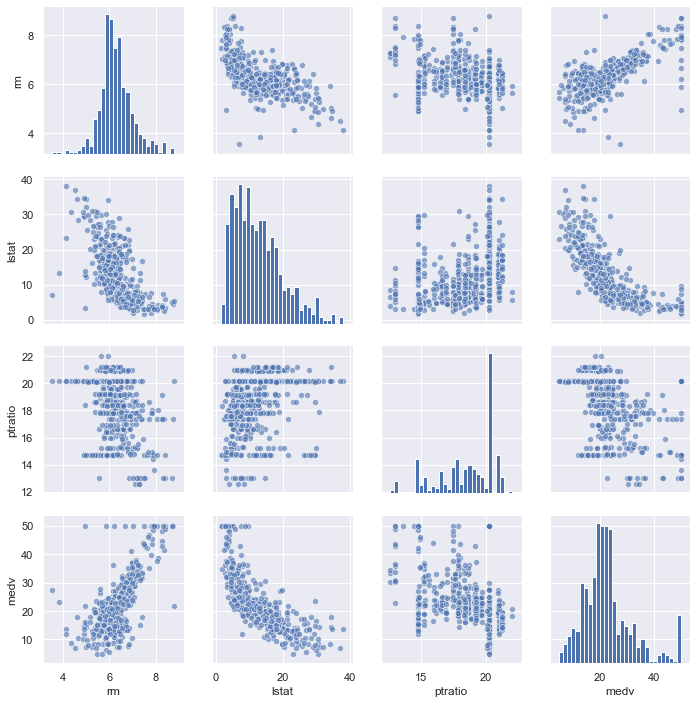

In [15]:
#pair plotting the feature variables
sns.pairplot(df[feature_var], plot_kws={'alpha':0.6}, diag_kws={'bins':30})

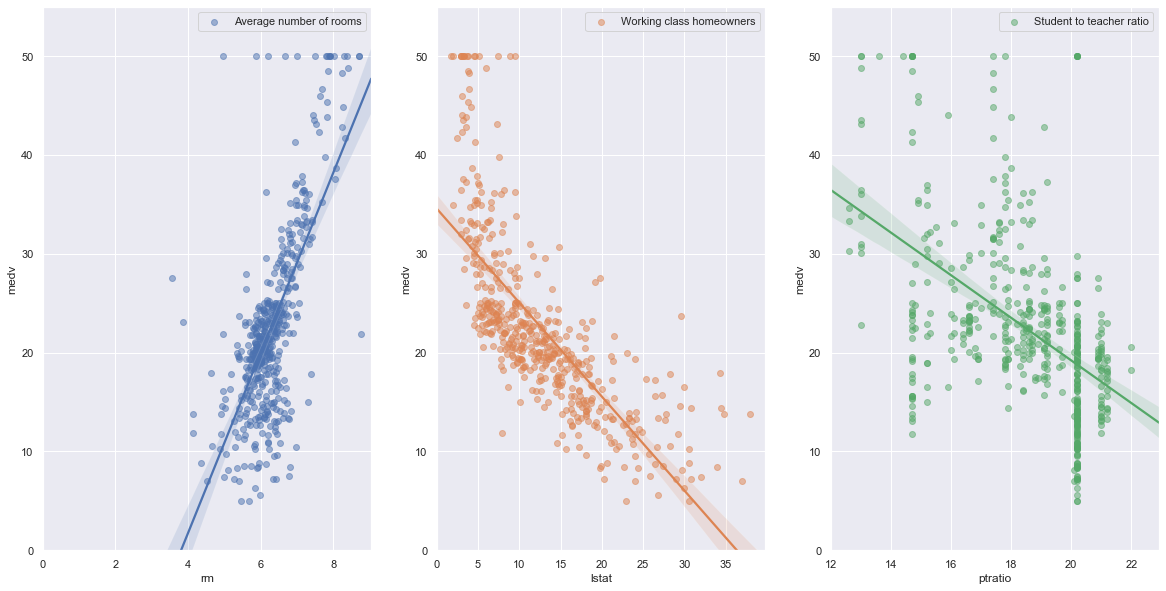

In [47]:
#Use Seaborn instead of matplotlib for best fit line 
#https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset
import matplotlib
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots(1, 3)
r = sns.regplot('rm', 'medv', df, ax=ax[0], label='Average number of rooms', scatter_kws={'alpha': 0.5})
r.set(ylim=(0, 55))
r.set(xlim=(0, None))
r.legend()
l = sns.regplot('lstat', 'medv', df, ax=ax[1], label='Working class homeowners', scatter_kws={'alpha': 0.5})
l.set(ylim=(0, 55))
l.set(xlim=(0, None))
l.legend()
p = sns.regplot('ptratio', 'medv', df, ax=ax[2], label='Student to teacher ratio', scatter_kws={'alpha': 0.5})
p.set(ylim=(0, 55))
p.set(xlim=(12, None))
p.legend()

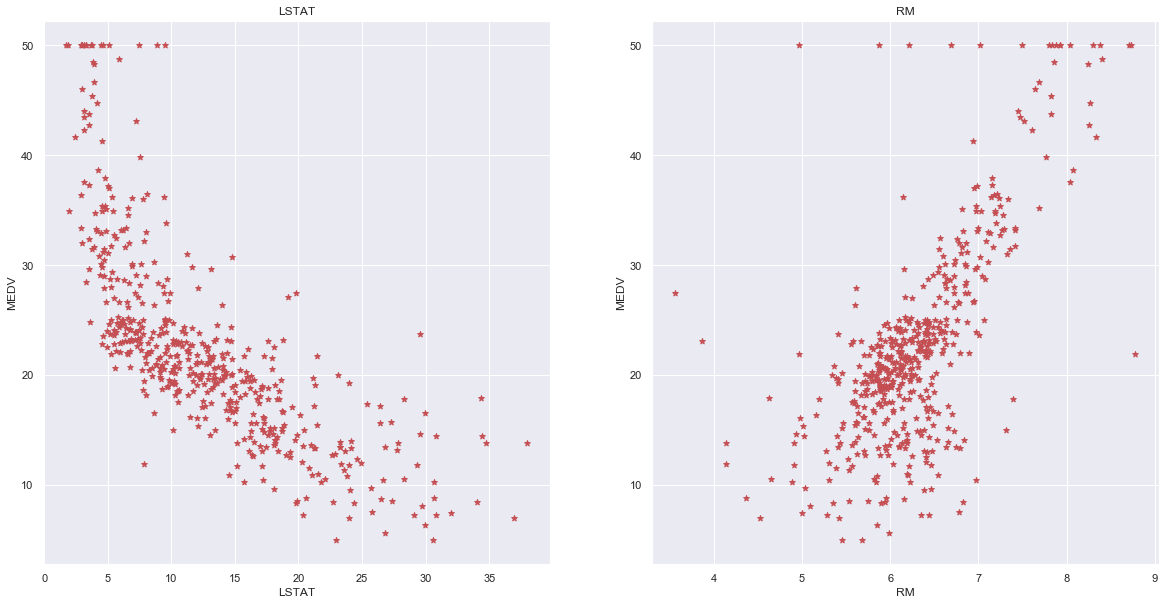

In [15]:
#Borrowed plot, manipulate this. Simple for loop using enumerate and len(data) & subplots
plt.figure(figsize=(20, 10))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='*', color="r")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Test using a basic ANOVA set up

In [16]:
NCR = df [ df ["chas"] == 0]
CR = df [ df ["chas"] == 1]

In [17]:
stats.f_oneway(CR["rm"], NCR["rm"])

F_onewayResult(statistic=4.231938627877385, pvalue=0.04018409929586845)

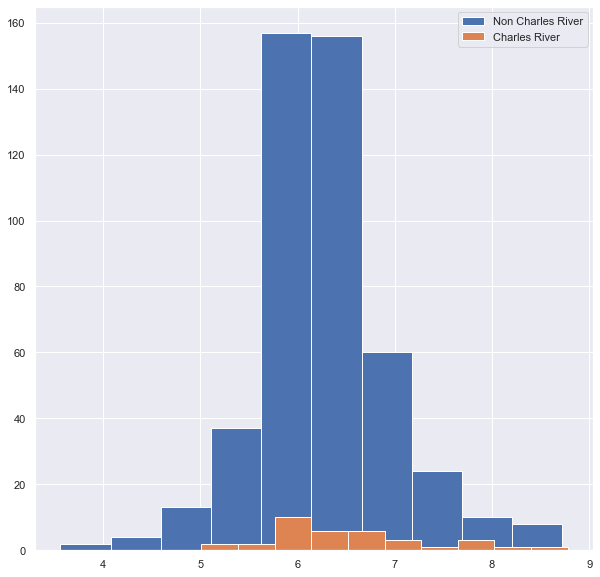

In [18]:
plt.hist( NCR ["rm"], label="Non Charles River")
plt.hist( CR ["rm"], label="Charles River")

plt.legend()
plt.show()

In [19]:
stats.f_oneway(CR["lstat"], NCR["lstat"])

F_onewayResult(statistic=1.4700936637073994, pvalue=0.22589895344450323)

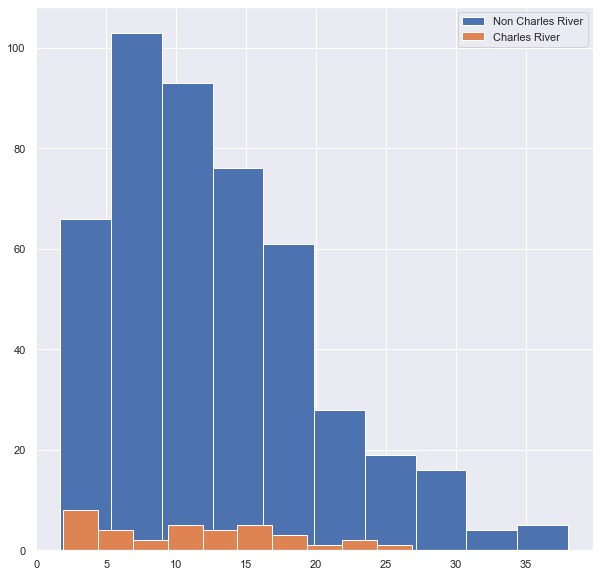

In [20]:
plt.hist( NCR ["lstat"], label="Non Charles River")
plt.hist( CR ["lstat"], label="Charles River")
plt.legend()
plt.show()

Importing the Boston House Prices dataset into your Jupyter notebook.

In [21]:
#test adding columns to the dataset

df["test"] = (df["tax"]*5).astype(np.int)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,test
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1480
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1210
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1210
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1110
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1365
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1365
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1365
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1365


In [32]:
#print out first 5 ages
output = df["medv"]
output.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [23]:
#assign initial inputs to the neural network - (Lstat, not Istat)
#Not including age
#inputs = df[["crim", "zn", "indus", "chas", "nox", "rm", "dis", "rad", "tax", "ptratio", "b","lstat","medv"]]
#inputs.head(5)

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
inputs = df[["rm","lstat"]]
inputs.head(5)

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [34]:
#Set up intial Neural Network
m = kr.models.Sequential()

#5 inputs
#change linear to sigmoid if you want. Try to mix & match layers to figure it out
#IMPORTANT be careful that it doesn't just regress towards the mean
m.add(kr.layers.Dense(10, input_dim=2, activation="linear")) #kernel_initializer="ones", bias_initializer="zeros"))
m.add(kr.layers.Dense(10, activation="linear")) #kernel_initializer="ones", bias_initializer="zeros"))                    
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [35]:
m.fit(inputs, output, epochs=10, batch_size=10)

Epoch 1/10
506/506 [==============================] - 2s 4ms/step - loss: 572.7863
Epoch 2/10
506/506 [==============================] - 0s 342us/step - loss: 337.4905
Epoch 3/10
506/506 [==============================] - 0s 344us/step - loss: 256.5474
Epoch 4/10
506/506 [==============================] - 0s 362us/step - loss: 200.4515
Epoch 5/10
506/506 [==============================] - 0s 312us/step - loss: 144.7895
Epoch 6/10
506/506 [==============================] - 0s 472us/step - loss: 95.5904
Epoch 7/10
506/506 [==============================] - 0s 374us/step - loss: 59.9649
Epoch 8/10
506/506 [==============================] - 0s 372us/step - loss: 40.5333
Epoch 9/10
506/506 [==============================] - 0s 298us/step - loss: 33.2811
Epoch 10/10
506/506 [==============================] - 0s 281us/step - loss: 31.4862


In [36]:
#Output is set to age
#Prediction of outputs, transpose & round to one decimal place.
#Don't expext any correlation - validated

np.around(m.predict(inputs).T,decimals=1)

array([[28.9, 25.8, 32.2, 32. , 31.2, 28.2, 22. , 18.7,  9.9, 19.2, 18.8,
        21.5, 19.5, 24.2, 23.7, 23.6, 25.2, 20.6, 20. , 21.5, 15. , 21. ,
        18.8, 16.7, 19.3, 17.8, 19.7, 19.3, 23.9, 25.2, 14.7, 21.9, 12.7,
        17.1, 17.7, 23.3, 21.9, 23.5, 23.2, 29.4, 32.7, 29.9, 26.7, 25.9,
        24. , 21.9, 20. , 18.3,  8.4, 18. , 21.2, 24.3, 28.5, 24.4, 20.1,
        32. , 27.6, 30.6, 25.9, 23.6, 20.4, 20.6, 27.4, 27.1, 29.4, 27.9,
        22.4, 24. , 19.8, 23.6, 27.2, 23.3, 26.4, 26. , 26.5, 25.3, 23.5,
        23.9, 23. , 23.4, 29.4, 27.8, 26.7, 25.6, 25.4, 28.2, 21.8, 24.9,
        30.5, 30.7, 26. , 26.3, 26.5, 26.6, 24.2, 28.2, 23.3, 35.9, 35.2,
        31.9, 26.9, 28.2, 24.8, 22. , 22.8, 18.9, 17.5, 21.5, 24.1, 21.1,
        22.5, 26.5, 19.3, 19.6, 24.3, 19.7, 23. , 23.3, 19.7, 20.1, 20.3,
        20.9, 18.5, 13.6, 18.4, 20.5, 11.4, 17.8, 22.1, 16.9, 23.9, 23.5,
        24.4, 19.7, 18. , 20.7, 19.1, 22.7, 16.1, 19. , 15.7,  4.6, 10.8,
        11.3,  7.1, 13.4, 17.8,  7.1, 

In [37]:
output.as_matrix()

C:\Users\reidy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [38]:
#Now data is of same dimension
#output.as_matrix() - m.predict(inputs)

#One of them needs to be transposed (.T)
#output.as_matrix() - m.predict(inputs).T

#Sum up the squared losses & take SQRT (mean squared error)

np.sqrt(np.sum((output.as_matrix() - m.predict(inputs).T)**2))

C:\Users\reidy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


126.04877799254004

Epoch 1/15
506/506 [==============================] - 0s 313us/step - loss: 30.8992
Epoch 2/15
506/506 [==============================] - 0s 269us/step - loss: 31.0599
Epoch 3/15
506/506 [==============================] - 0s 287us/step - loss: 31.3049
Epoch 4/15
506/506 [==============================] - 0s 277us/step - loss: 31.1062
Epoch 5/15
506/506 [==============================] - 0s 267us/step - loss: 30.9981
Epoch 6/15
506/506 [==============================] - 0s 271us/step - loss: 30.8943
Epoch 7/15
506/506 [==============================] - 0s 297us/step - loss: 31.4146
Epoch 8/15
506/506 [==============================] - 0s 421us/step - loss: 31.4649
Epoch 9/15
506/506 [==============================] - 0s 308us/step - loss: 30.8721
Epoch 10/15
506/506 [==============================] - 0s 302us/step - loss: 31.0169
Epoch 11/15
506/506 [==============================] - 0s 374us/step - loss: 31.0578
Epoch 12/15
506/506 [==============================] - 0s 374us/step - los

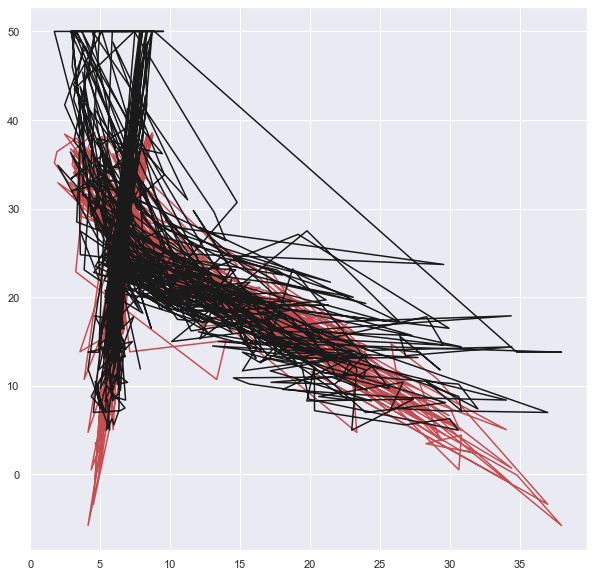

In [39]:
#Train the model
#All x and y values are passed through 15 times
#epochs are full passes through the NN
m.fit(inputs, output, epochs=15,batch_size=10)

#Run each x value through the neural network
p = m.predict(inputs)

#Plot the values
#Just plotting p versus y in this instance
plt.plot(inputs, p, "r-", label="Prediction")
plt.plot(inputs, output, "k-", label="Original")

In [23]:
#create new neural network
m = kr.models.Sequential()

#add a single neuron in a single layer, initialised with weight 1 and bias 0. 
#Change the first number to add more neurons, input_dim is how many inputs the neural network will take
#kernel initialiser sets weights to 1, biases also set to 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer="ones", bias_initializer="zeros"))

#compile the model
#for training use loss, SGD Stochastic Gradient Descent - NN method used to play with the weights to reduce the means squared error 
m.compile(loss="mean_squared_error", optimizer="sgd")

In [24]:
x = np.arange(0.0, 10.0, 1)

#
y = m.predict(x)

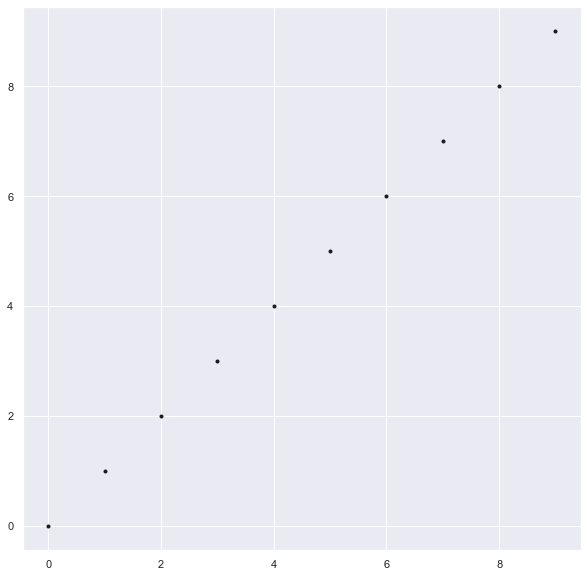

In [25]:
plt.plot(x, y, 'k.')

In [26]:
#EXAMPLE ONLY hard code the initializers
#create new neural network
m = kr.models.Sequential()

#add a single neuron in a single layer, initialised with weight 1 and bias 0. 
#Change the first number to add more neurons, input_dim is how many inputs the neural network will take
#kernel initialiser sets weights to 1, biases also set to 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer=kr.initializers.Constant(value=2), bias_initializer=kr.initializers.Constant(value=1)))

#compile the model
#for training use loss, SGD Stochastic Gradient Descent - NN method used to play with the weights to reduce the means squared error 
m.compile(loss="mean_squared_error", optimizer="sgd")

In [27]:
x = np.arange(0.0, 10.0, 1)

#Now y is x value * 2 (weight) + 1 (bias)
y = m.predict(x)

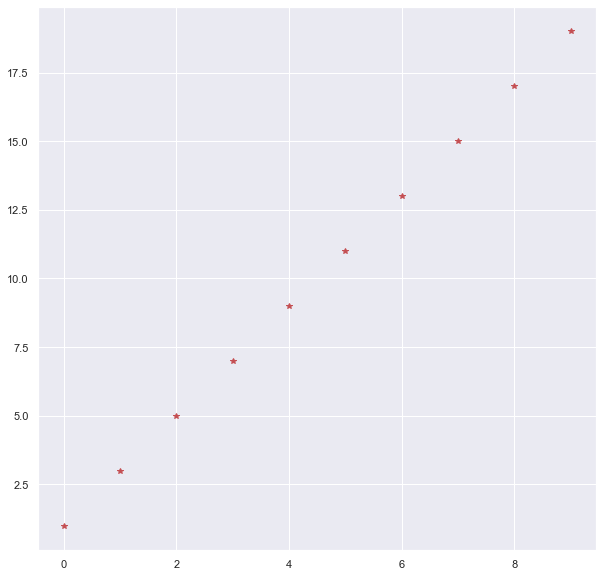

In [28]:
plt.plot(x, y, 'r*')

In [29]:
#EXAMPLE ONLY hard code the initializers
#create new neural network
m = kr.models.Sequential()

#add a new layer with two neurons in a single layer (first layer)
m.add(kr.layers.Dense(2, input_dim=1, activation="linear"))

#add a single neuron in a single layer, initialised with weight 1 and bias 0.
#no input dimension required as it follows on from previous layer and must take 2 inputs
#remember these are weight & bias for (second layer)
m.add(kr.layers.Dense(1, activation="linear", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))
2,3
#set the weight/bias of the two neurons.
#EXAMPLE ONLY we won't use set weights
#bias are b1 -5, b2 -3 ; weights are w11 2, w12 3.
m.layers[0].set_weights([np.matrix([2,3]),np.array([-5,-3])])

#compile the model
#for training use loss, SGD Stochastic Gradient Descent - NN method used to play with the weights to reduce the means squared error 
m.compile(loss="mean_squared_error", optimizer="sgd")

In [30]:
x = np.arange(0.0, 10.0, 1)

#Now y is x value * 2 (weight) + 1 (bias)
y = m.predict(x)

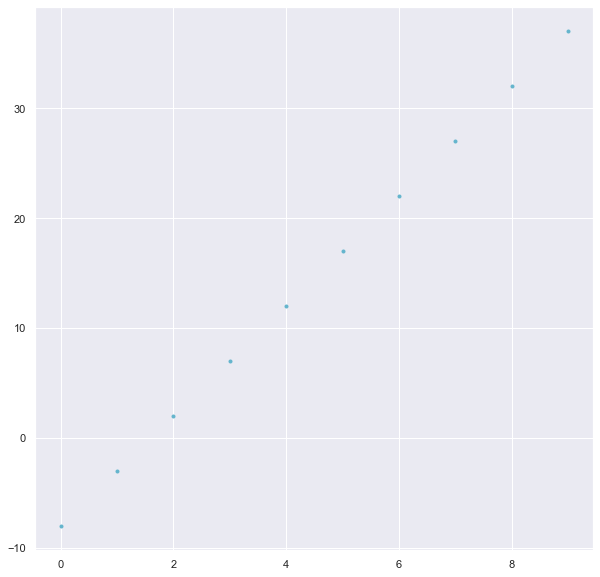

In [31]:
plt.plot(x, y, 'c.')

In [32]:
#EXAMPLE ONLY hard code the initializers
#create new neural network
m = kr.models.Sequential()



#add a single neuron in a single layer, initialised with weight 1 and bias 0.
#activation function is sigmoid
m.add(kr.layers.Dense(1, input_dim=1, activation="sigmoid", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))


#compile the model
#for training use loss, SGD Stochastic Gradient Descent - NN method used to play with the weights to reduce the means squared error 
m.compile(loss="mean_squared_error", optimizer="sgd")

In [33]:
x = np.arange(-10.0, 10.0, 1)

#Now y is x value * 2 (weight) + 1 (bias)
y = m.predict(x)

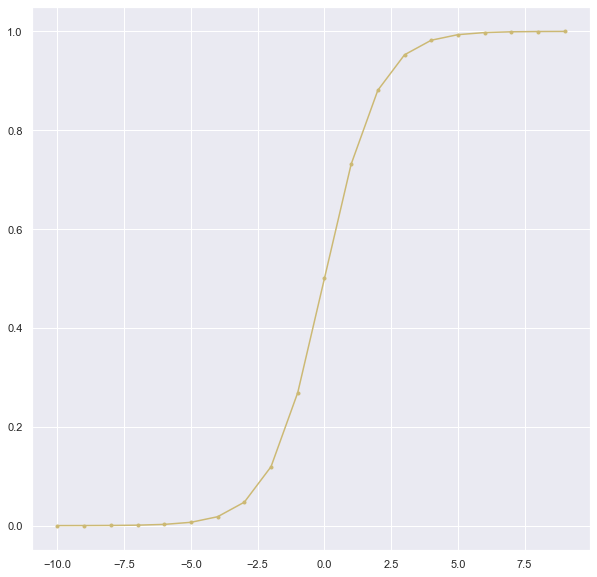

In [34]:
plt.plot(x, y, 'y.-')

In [35]:
x = np.linspace(-10.0,10.0,2000)

y_l = (3.0 * x) + 5.0
y_p = (x * x) - 41.0
y_s = 10.0 * np.sin(2.0 * x)


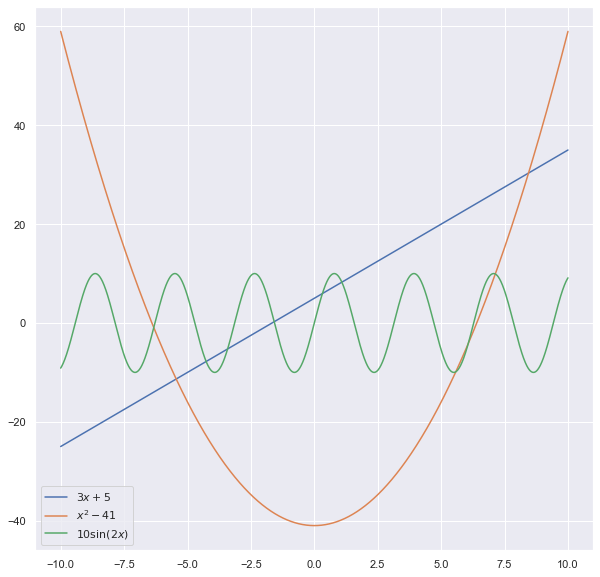

In [36]:
plt.plot(x, y_l, label="$3x + 5$")
plt.plot(x, y_p, label="$x^2 - 41$")
plt.plot(x, y_s, label="$10 \sin(2x)$")

plt.legend()

Epoch 1/15
2000/2000 [==============================] - 2s 1ms/step - loss: 49.0677
Epoch 2/15
2000/2000 [==============================] - 1s 256us/step - loss: 48.9774
Epoch 3/15
2000/2000 [==============================] - 1s 256us/step - loss: 48.9461
Epoch 4/15
2000/2000 [==============================] - 0s 241us/step - loss: 48.8684
Epoch 5/15
2000/2000 [==============================] - 0s 245us/step - loss: 48.8029
Epoch 6/15
2000/2000 [==============================] - 0s 248us/step - loss: 48.68170s
Epoch 7/15
2000/2000 [==============================] - 1s 264us/step - loss: 48.5359
Epoch 8/15
2000/2000 [==============================] - 0s 244us/step - loss: 48.3653
Epoch 9/15
2000/2000 [==============================] - 1s 255us/step - loss: 48.2394
Epoch 10/15
2000/2000 [==============================] - 1s 256us/step - loss: 48.0794
Epoch 11/15
2000/2000 [==============================] - 1s 255us/step - loss: 47.9153
Epoch 12/15
2000/2000 [=============================

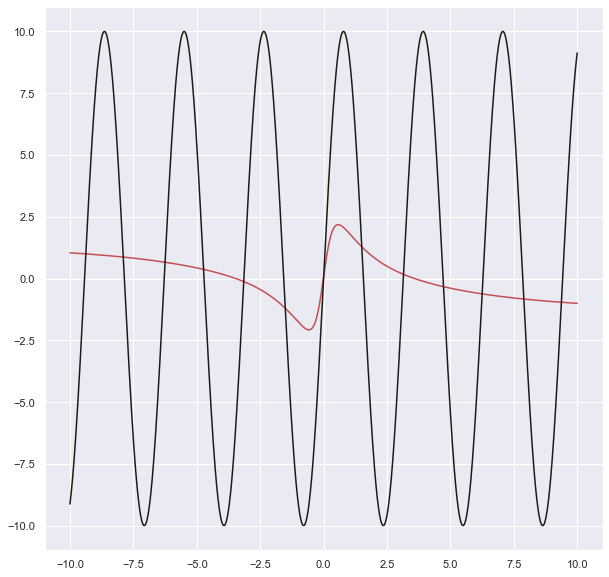

In [37]:
#y = y_l
#y = y_p
y = y_s

#Create a new neural network
m = kr.models.Sequential()

#Add neurons
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

#Add neurons (changed activation function from tanh to sigmoid)
m.add(kr.layers.Dense(10, input_dim=1, activation="tanh"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))

#compile the model
#learning rate, number associated with the size of the jump its willing to take when it gets something wrong
#Take x, predict y, compare y to what it should have been, now use MSE to calculate how far away you were
#SGD uses the learning rate to jump weights and biases in NN a little in the right direction. next time X gets a closer prediction y.
#Can use ADAM instead of SGD for polynomials
m.compile(loss="mean_squared_error", optimizer="adam")

#Train the model
#All x and y values are passed through 15 times
#epochs are full passes through the NN
m.fit(x, y, epochs=15,batch_size=10)

#Run each x value through the neural network
p = m.predict(x)

#Plot the values
#Just plotting p versus y in this instance
plt.plot(x, p, "r-", label="Prediction")
plt.plot(x, y, "k-", label="Original")